In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import os
import glob

In [2]:
data_wanted = pd.read_csv('../data/from_lilianne.dat', delim_whitespace=True, 
                          usecols=['idx','objectID','hostless'])

wanted_names = list(data_wanted[data_wanted['hostless']]['objectID']) + ['ZTF23abdynfn','ZTF22aaaihet','ZTF23absflyh',
                                                                         'ZTF23aarlxdf','ZTF23aawhcjb','ZTF23aajenxf',
                'ZTF22aaljlzq','ZTF22abnwvyc','ZTF23aabtgej','ZTF22aadeuwu','ZTF23aafmjbx','ZTF23aagaiju',
                'ZTF22aaahull','ZTF22aaszlph','ZTF23aaqfdby','ZTF22abzvyku','ZTF22aahhubz','ZTF23aaelzdb',
                'ZTF23aboebgh','ZTF23aamxeoe','ZTF23aamqonh','ZTF22abtltcw','ZTF22aaausrb','ZTF21abiwpjm',
                'ZTF22abvaggn','ZTF22abyuoan','ZTF20aayvmyh','ZTF22aaaeohg','ZTF22aasaapb','ZTF22aalmrqp',
                'ZTF23aanukvi','ZTF22abmpqbq','ZTF23abbsfxp','ZTF22aaombjf','ZTF22abzbyyw','ZTF22abfxmvf',
                'ZTF22aaafohf','ZTF22abfyvhf','ZTF22aafumyr','ZTF23aakmewi','ZTF23ablspnz','ZTF23aanuvih',
                'ZTF22aahecwj','ZTF22abnqzle','ZTF23aafggjj','ZTF22aaogwbd','ZTF22aadetzs','ZTF23aapvrkk',
                'ZTF23abgsmsg','ZTF22abjafpr','ZTF23aamsekn','ZTF23abcqzvm','ZTF23abgvtxr','ZTF22aajhtpy',
                'ZTF22abvngdr','ZTF23aaazegi','ZTF22aaagvyp','ZTF23aaejvzv','ZTF23abgzmfs','ZTF23abcufxh',
                'ZTF22aapuake','ZTF22aadlmgg','ZTF22aasoali','ZTF23abaslfm','ZTF22ablhldn','ZTF22abtotgu',
                'ZTF23aagdbbv','ZTF23aaxyawz','ZTF22aaftcmp','ZTF23abqygjv','ZTF18aaapivw']

wanted_names = np.unique(np.array(wanted_names))

should_not_survive = ['ZTF22aauiabm',
'ZTF23abmoxlu',
'ZTF23aaiyexs',
'ZTF22aakdbia',
'ZTF22abbausm',
'ZTF22aaajjcq',
'ZTF22aazmooy',
'ZTF23aaaairl',
'ZTF22aafoqrd',
'ZTF23absbyol',
'ZTF22aanrqje',
'ZTF23aadvjqb',
'ZTF22abzakdd',
'ZTF22aagzbux',
'ZTF22absxatm',
'ZTF22aapubuy',
'ZTF23aajlkxc',
'ZTF22aboixdd',
'ZTF23aaawcvx',
'ZTF22aabtyli',
'ZTF22abahblc',
'ZTF19abszdld',
'ZTF22aahebcu','ZTF18aajpqbj','ZTF20aclhwqx','ZTF20abobsuw','ZTF20aazqifr',
                      'ZTF18abciaaf','ZTF18aagrcbh','ZTF18abcyujq','ZTF19aalorrk'] + \
list(data_wanted[~data_wanted['hostless']]['objectID']) + list(pd.read_csv('../data/contaminants.dat'))

should_not_survive = np.unique(np.array(should_not_survive))

sso_names = ['ZTF22abbbydh','ZTF23aaoqpbu','ZTF22abdgjks','ZTF23aasnmmq','ZTF22abhfiew','ZTF22abisymj','ZTF22abfbxop',
             'ZTF22abhhnzr','ZTF23aasnmru','ZTF22abqmkvz','ZTF23aasnmke','ZTF23aasnisu','ZTF22abmzlbw','ZTF22ablizvx',
             'ZTF22abngynh','ZTF22abmgjsc','ZTF22aaodjcr','ZTF22abpugfh','ZTF22abjiryo','ZTF23aaoginy','ZTF22abhifxw',
             'ZTF23aaogjqe','ZTF23aaogjku','ZTF23aaummdv','ZTF23aaogigp','ZTF23aaogiju','ZTF23aaogins','ZTF22aadtiqy',
             'ZTF23aauyuxn','ZTF22aautkkx','ZTF23aaogiaf','ZTF22aaamcvt','ZTF23aaugvmy','ZTF23aaoghvk','ZTF22aavchkl',
             'ZTF23aaofwyr','ZTF23aaogjzn','ZTF23aaoggla','ZTF22abbxmvp','ZTF22abjkduc','ZTF23aaogjoi','ZTF23aanbiwv',
             'ZTF23aaotrxv','ZTF23aaofzxw','ZTF22abpuvwl','ZTF22aavchdb','ZTF23aasoswf','ZTF22aalbvkt','ZTF23aaogpip',
             'ZTF22aaamctk','ZTF22aaemvon','ZTF23aalvzey','ZTF23aaogfwq','ZTF23aaogpix','ZTF22aarxhdg','ZTF22abkwgdf',
             'ZTF23aaogfzp','ZTF23aakabyo','ZTF23aaogjqd','ZTF22aaerjna','ZTF23aaogjgw','ZTF22aacqokz','ZTF23aaognat',
             'ZTF23aaogjor','ZTF22aadgikt','ZTF22abgcphv','ZTF23aaogihz','ZTF23aaogijv','ZTF22aamslae','ZTF23aaofzxv',
             'ZTF22aahhaxl','ZTF23aaogfbe','ZTF23aaogiin','ZTF23aaoggtk','ZTF23aaogkze','ZTF23aaqzujy','ZTF22aachsxl',
             'ZTF22abqmgeg','ZTF22aammugu','ZTF23aanxmyw','ZTF22aacbhed','ZTF23aakmhew','ZTF23aaogggc','ZTF23aasnoqs',
             'ZTF22abdaraj','ZTF23aaogjts','ZTF23aaoggkr','ZTF22abdfcni','ZTF22abgdimv','ZTF23aaogijq','ZTF23aaouwwj',
             'ZTF23aasnopz','ZTF23aaogfyw','ZTF22abqcija','ZTF23aarkjme','ZTF22aafrcia','ZTF23aaogfgz','ZTF23aaoggtx',
             'ZTF22aapfnai']

In [3]:
fname_use = '/media/emille/git/COIN/CRP7/hostless/code/power_spectrum_analysis_20240319.csv'

op = open(fname_use, 'w')
op.write('name,answer,ks_sci_stat_7,ks_sci_stat_15,ks_sci_stat_29,ks_temp_stat_7,ks_temp_stat_15,ks_temp_stat_29,' + \
             'ks_sci_pvalue_7,ks_sci_pvalue_15,ks_sci_pvalue_29,ks_temp_pvalue_7,ks_temp_pvalue_15,ks_temp_pvalue_29,'
             'ad_sci_stat_7,ad_sci_stat_15,ad_sci_stat_29,ad_temp_stat_7,ad_temp_stat_15,ad_temp_stat_29,' + \
             'ad_sci_pvalue_7,ad_sci_pvalue_15,ad_sci_pvalue_29,ad_temp_pvalue_7,ad_temp_pvalue_15,ad_temp_pvalue_29\n')
op.close()

In [4]:
# check if tables are consistent
print('Number SSO: ', len(sso_names), '   unique: ', np.unique(np.array(sso_names)).shape[0])
print('Number should not survive: ', len(should_not_survive), '   unique: ', np.unique(np.array(should_not_survive)).shape[0])
print('Number wanted: ', len(wanted_names), '   unique: ', np.unique(np.array(wanted_names)).shape[0])

Number SSO:  99    unique:  99
Number should not survive:  76    unique:  76
Number wanted:  130    unique:  130


In [9]:
flag_sso_wanted = np.array([item in sso_names for item in wanted_names])
print('Objects in sso also in wanted:', sum(flag_sso_wanted))

flag_wanted_sso = np.array([item in wanted_names for item in sso_names])
print('Objects in wanted also in sso:', sum(flag_wanted_sso))

flag_sns_wanted = np.array([item in wanted_names for item in should_not_survive])
print('Objects in should_not_survive also in wanted:', sum(flag_sns_wanted))

flag_wanted_sns = np.array([item in should_not_survive for item in wanted_names])
print('Objects in wanted also in should_not_survive:', sum(flag_wanted_sns))

Objects in sso also in wanted: 0
Objects in wanted also in sso: 0
Objects in should_not_survive also in wanted: 0
Objects in wanted also in should_not_survive: 0


In [10]:
wanted_names = wanted_names[~flag_wanted_sns]

In [11]:
wanted_names.shape

(123,)

In [12]:
res_directory = '/media3/CRP7/hosts/misc_results/power_spec_output/'

In [13]:
flist_ks = glob.glob(res_directory + '*_kstest.csv')
len(flist_ks)

1645

In [14]:
flist_ad = glob.glob(res_directory + '*_anderson-darling.csv')
len(flist_ad)

1645

In [15]:
done_ids = []
fail = []

for i in range(len(should_not_survive)):
    
    fname_ks = res_directory + should_not_survive[i] + '_kstest.csv'
    objid = should_not_survive[i]
    
    if objid not in done_ids and os.path.isfile(fname_ks):        
        
        data_ks = pd.read_csv(fname_ks)

        name_ad = res_directory + should_not_survive[i] + '_anderson-darling.csv'
        if os.path.isfile(name_ad):
            data_ad = pd.read_csv(name_ad)
        else:
            data_ad = pd.DataFrame(np.full(data_ks.shape, -99), columns=data_ks.keys())

        op = open(fname_use, 'a')
        ans = 'should_not_survive'
        op.write(objid + ',' + ans + ',')
        for i in range(data_ks.shape[0]):
            op.write(str(data_ks.values[i][2]) + ',')
        for i in range(data_ks.shape[0]):
            op.write(str(data_ks.values[i][3]) + ',')
        for i in range(data_ad.shape[0]):
            op.write(str(data_ad.values[i][2]) + ',')
        for i in range(data_ad.shape[0] - 1):
            op.write(str(data_ad.values[i][3]) + ',')
        op.write(str(data_ad.values[-1][3]) + '\n')
        op.close()

        done_ids.append(objid)
        
    elif not os.path.isfile(fname_ks):
        fail.append(fname_ks)

In [16]:
np.unique(np.array(done_ids)).shape

(55,)

In [17]:
len(fail)

21

In [25]:
pos_bar = fail[1].rfind('/')
pos_under = fail[1].rfind('_')
fail_names = [item[pos_bar + 1:pos_under] for item in fail]

In [29]:
data_done = pd.read_csv(fname_use)
data_done.shape

(151, 26)

In [13]:
np.unique(data_done['name']).shape

(55,)

In [20]:
for i in range(len(wanted_names)):
    
    fname_ks = res_directory + wanted_names[i] + '_kstest.csv'
    objid = wanted_names[i]
    
    if objid not in done_ids and os.path.isfile(fname_ks):
        
        data_ks = pd.read_csv(fname_ks)

        name_ad = res_directory + wanted_names[i] + '_anderson-darling.csv'
        if os.path.isfile(name_ad):
            data_ad = pd.read_csv(name_ad)
        else:
            data_ad = pd.DataFrame(np.full(data_ks.shape, -99), columns=data_ks.keys())

        op = open(fname_use, 'a')
        ans = 'wanted'
        op.write(objid + ',' + ans + ',')
        for i in range(data_ks.shape[0]):
            op.write(str(data_ks.values[i][2]) + ',')
        for i in range(data_ks.shape[0]):
            op.write(str(data_ks.values[i][3]) + ',')
        for i in range(data_ad.shape[0]):
            op.write(str(data_ad.values[i][2]) + ',')
        for i in range(data_ad.shape[0] - 1):
            op.write(str(data_ad.values[i][3]) + ',')
        op.write(str(data_ad.values[-1][3]) + '\n')
        op.close()

        done_ids.append(objid)
        
    elif not os.path.isfile(fname_ks):
        fail.append(fname_ks)
        

In [21]:
data_done = pd.read_csv(fname_use)
data_done.shape

(151, 26)

In [22]:
len(fail)

48

In [30]:
np.unique(data_done['name']).shape

(151,)

In [31]:
data = data_done
wanted = data[data['answer'] == 'wanted']
out = data[data['answer'] == 'should_not_survive']

In [32]:
name, pop = np.unique(data['answer'], return_counts=True)
for i in range(len(name)):
    print(name[i], ': ', pop[i])

should_not_survive :  55
wanted :  96


ks_sci_stat_7
ks_sci_stat_15
ks_sci_stat_29
ks_temp_stat_7
ks_temp_stat_15
ks_temp_stat_29


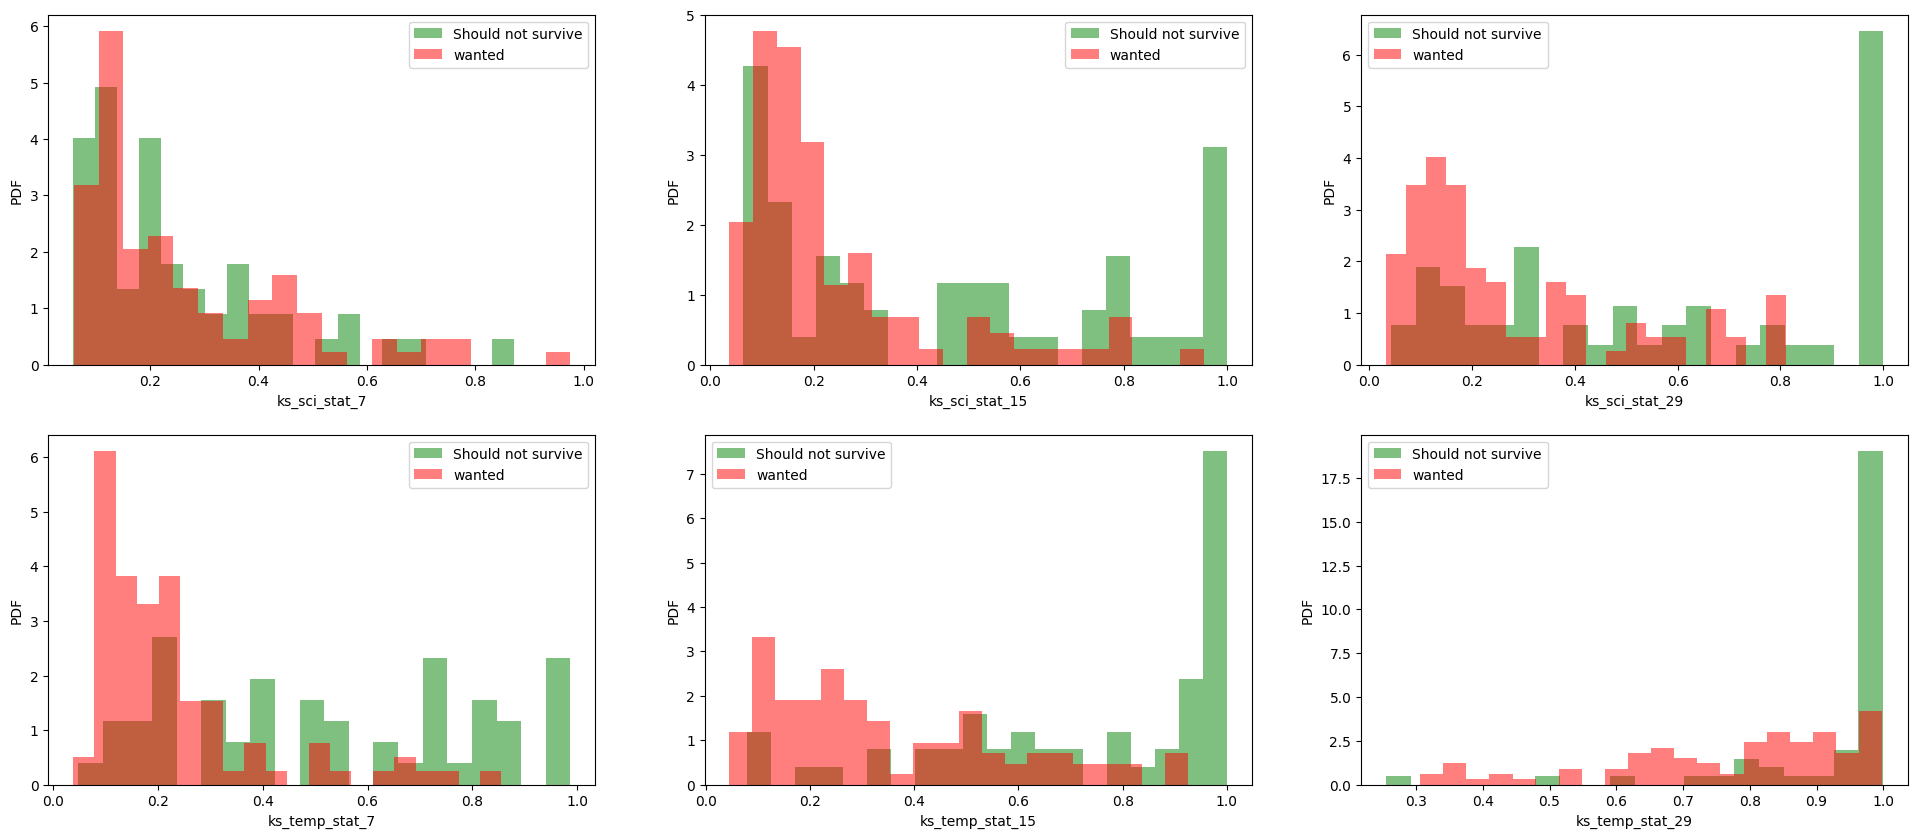

In [48]:
nbins = 20

plt.figure(figsize=(24,10))

for i in range(2, 8):
    name = list(data.keys())[i]
    print(name)
    
    plt.subplot(2,3,i-1)        
    plt.hist(out[name], label='Should not survive', density=True, alpha=0.5, bins=nbins, color='green')
    plt.hist(wanted[name], label='wanted', density=True, alpha=0.5, bins=nbins, color='red')
    plt.xlabel(name)
    plt.ylabel('PDF')
    #plt.xscale('log')
    plt.legend()

#plt.show()
plt.savefig('../plots/kstest_2classes.png')

In [25]:
out['ks_temp_stat_15'].describe()

count    55.000000
mean      0.733056
std       0.282589
min       0.079397
25%       0.534309
50%       0.816206
75%       0.997462
max       1.000000
Name: ks_temp_stat_15, dtype: float64

In [26]:
wanted['ks_temp_stat_15'].describe()

count    96.000000
mean      0.346632
std       0.227185
min       0.045352
25%       0.164271
50%       0.282374
75%       0.497010
max       0.925427
Name: ks_temp_stat_15, dtype: float64

In [25]:
classname, pop = np.unique(data[data['ks_temp_stat_15'] <= 0.5]['answer'].values, return_counts=True)

for i in range(len(classname)):
    print(classname[i], ':', pop[i])

should_not_survive : 12
wanted : 72


In [27]:
pop[0]/sum(pop)

0.14285714285714285

In [29]:
max(out['ks_sci_pvalue_7'])

0.5033814088835686

In [30]:
min(out['ks_sci_pvalue_7'])

2.9760543274374823e-176

ad_sci_stat_7
ad_sci_stat_15
ad_sci_stat_29
ad_temp_stat_7
ad_temp_stat_15
ad_temp_stat_29


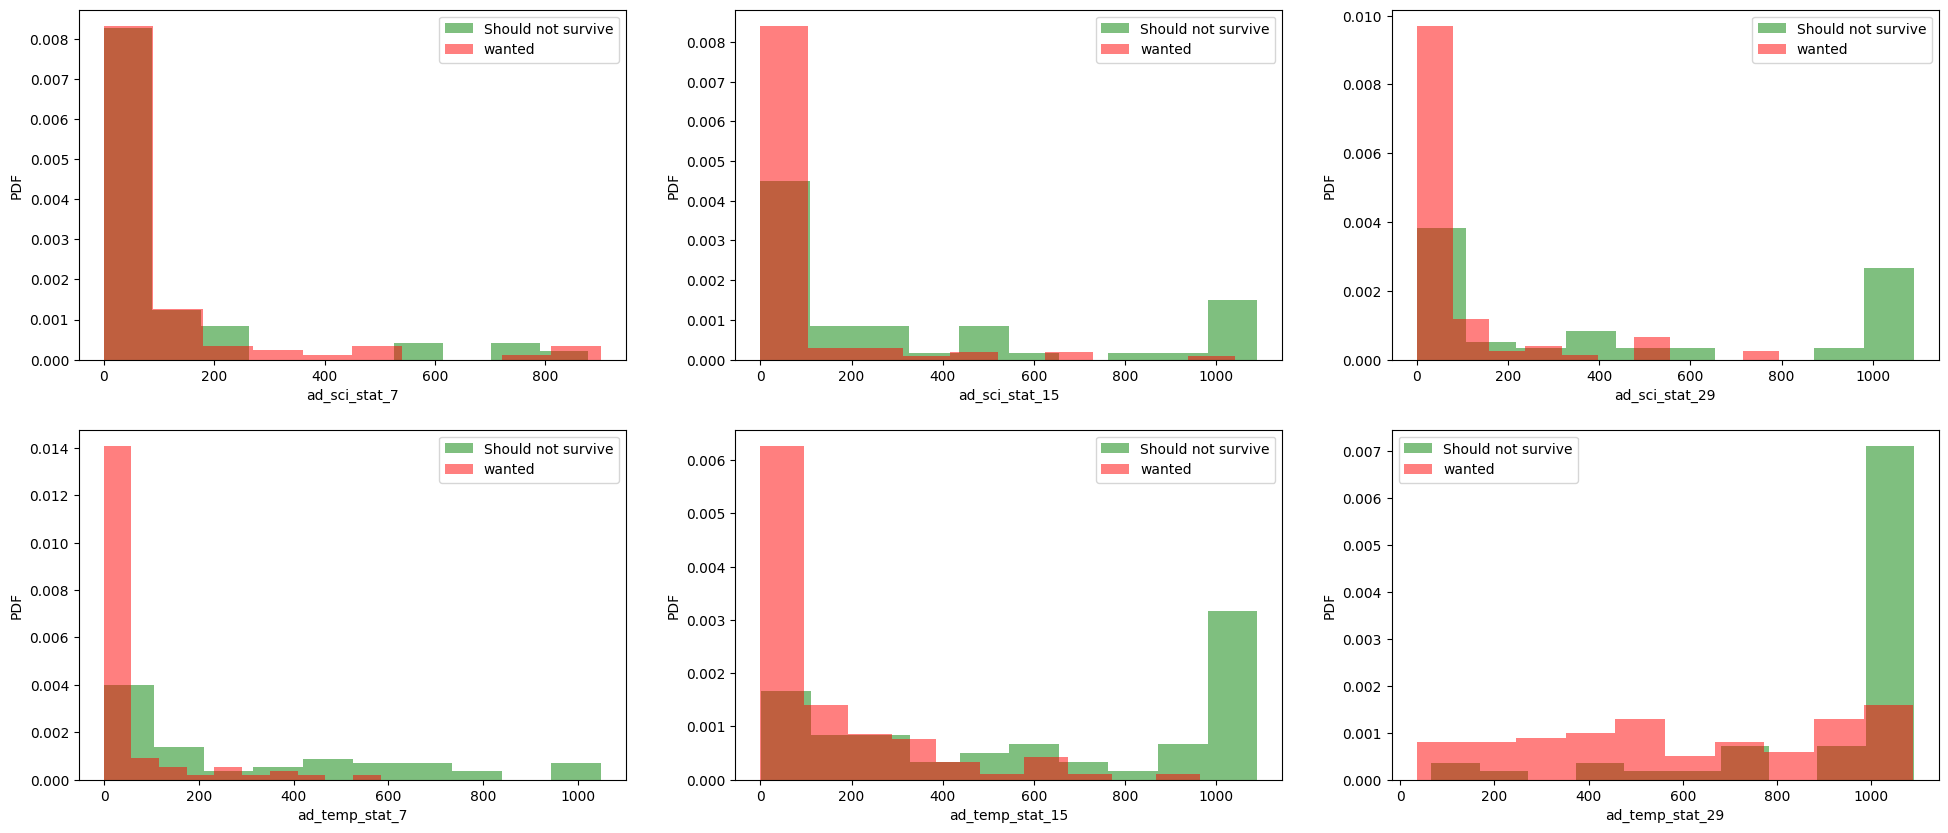

In [51]:
nbins = 30

plt.figure(figsize=(24,10))

for i in range(14, 20):
    name = list(data.keys())[i]
    
    plt.subplot(2,3,i-13)        
    plt.hist(out[name], label='Should not survive', density=True, alpha=0.5, color='green')
    plt.hist(wanted[name], label='wanted', density=True, alpha=0.5, color='red')
    plt.xlabel(name)
    plt.ylabel('PDF')
    #plt.xscale('log')
    plt.legend()

#plt.show()
plt.savefig('../plots/ad_2classes.png')

In [56]:
out['ad_sci_stat_15'].describe()

count      55.000000
mean      320.178113
std       396.704152
min        -0.515419
25%        12.596263
50%       110.679618
75%       502.078531
max      1090.165670
Name: ad_sci_stat_15, dtype: float64

In [57]:
wanted['ad_sci_stat_15'].describe()

count      96.000000
mean       71.041172
std       162.532307
min        -0.360666
25%         5.633183
50%        18.356688
75%        47.987582
max      1041.608228
Name: ad_sci_stat_15, dtype: float64

In [58]:
classname, pop = np.unique(data[data['ad_sci_stat_15'] <=48]['answer'].values, 
                           return_counts=True)

for i in range(len(classname)):
    print(classname[i], ':', pop[i])

should_not_survive : 23
wanted : 72


In [59]:
pop[0]/sum(pop)

0.24210526315789474